## Match the Hydrographs Game

A hydrograph shows discharge, Q, in a river or stream through time. Certain characteristics of a single envent in a hydrograph can inform us about the processes that are acting in a watershed, for example how water is delivered from hillslopes to channels. Longer term (yearly) trends in hydrographs generally reflect larger scale controls on discharge such as climate and size of the drainage basin. 

The goal of this exercise is to analyze these hydrographs in order to better understand the multiple factors that control hydrograph shape including
* Regional climate
* Seasonal changes in climate
* Water delivery from the hillslopes to channels


### San Pedro River, AZ
* The San Pedro River is the last major, undammed desert river in the American Southwest.
* At the USGS discharge station on the [San Pedro River at Redington Bridge](https://waterdata.usgs.gov/monitoring-location/09472050/#parameterCode=00060&period=P365D&showMedian=false), the San Pedro has a drainage area of 8,000 km$^2$.
* The north-flowing San Pedro is fed by numerous tributaries that drain relatively short and steep catchments oriented more or less perpendicular to the mainstem.


<div>
<img src="img/sanpedro_map.png" width="500"/>
</div>

<div>
<img src="img/sanpedro_pic.png" width="500"/>
</div>

### Hood River, OR
* The watershed is on the eastern flanks of the Cascade Mountains; moist air from the Pacific Ocean undergoes orographic lifting as it encounters the high elevations along the western and southern boundaries of the watershed, resulting in high precipitation in these regions. 
* The headwaters of the watershed are fed in by the glaciers along the northern and eastern sides of Mount Hood. 
* At the USGS discharge station on [Hood River at Tucker Bridge](https://waterdata.usgs.gov/monitoring-location/14120000/#parameterCode=00060&period=P365D&showMedian=false), the Hood River has a drainage area of 722 km$^2$.

* Average annual precipitation at higher elevations in the watershed is 390 cm/year



<div>
<img src="img/mthood_map.png" width="500"/>
</div>

<div>
<img src="img/mthoodview.jpg" width="500"/>
</div>

### Matanuska River, AK
* The Matanuska River is located near Anchorage, AK and is sourced by the Matanuska Glacier
* At the USGS discharge station on the [Matanuska River at Palmer](https://waterdata.usgs.gov/monitoring-location/15284000/#parameterCode=00060&period=P365D&showMedian=false) upstream drainage area is 5335 km$^2$.
* In addition to season-to-season and year-to-year variations, the Matanuska River also exhibits diurnal/daily flow rate fluctuations, due to the changes in glacier and snow melt (especially at higher elevations) between day and night. 
* Mean annual precip = 35 cm rain; 122 cm snow



<div>
<img src="img/matanuska_map.png" width="500"/>
</div>

<div>
<img src="img/matanuska_braided.jpg" width="500"/>
</div>

### Santa Fe River, FL
* The [Santa Fe River at OLeno](https://waterdata.usgs.gov/monitoring-location/02321898/#parameterCode=00060&period=P365D&showMedian=false) has an upstream drainage area of 3574 km$^2$.

* The Santa Fe River in north-central Florida is typical of many rivers in karst regions in that it completely disappears underground and then reappears 5 km (3 mi) downstream.

* The Santa Fe River is usually a slow-flowing river. This slow flow speed, combined with the abundant leaf-drop from nearby trees leads to a very dark-brown river due to dissolved tannins.
* Average annual precip = 150 cm


<div>
<img src="img/oleno_map.png" width="800"/>
</div>

<div>
<img src="img/oleno_upstream.jpg" width="500"/>
</div>
<div>
<img src="img/olenospring.jpg" width="500"/>
</div>

### Running this notebook
We are working in a Jupyter notebook environment. A Jupyter notebook is a browser-based application that allows you to create and share documents (i.e. Jupyter Notebook files) that contain live code, equations, visualizations, and narrative text. 

Below are several cells that will import discharge and precipitation data and create a hydrograph-hyetograph of this data. You will use this notebook and the figures to decide which hydro-hyetograph belongs to each location.

Below, import some python packages we will need.

In [1]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Import data
The cell below imports discharge and precipitation data from four rivers. The data records are all around 2 years long, but do not cover the same time periods.

In [2]:
dataloc = "./data/four_rivers/"
river1 = pd.read_csv(dataloc + "river1.csv", parse_dates=['datetime'], index_col=['datetime'])
river2 = pd.read_csv(dataloc + "river2.csv", parse_dates=['datetime'], index_col=['datetime'])
river3 = pd.read_csv(dataloc + "river3.csv", parse_dates=['datetime'], index_col=['datetime'])
river4 = pd.read_csv(dataloc + "river4.csv", parse_dates=['datetime'], index_col=['datetime'])

In the cell below, I use the command `head()` on the dataframe `river1`, and I can see the first five lines of data in river1.

In [3]:
river1.head()

,discharge,flag,precip
datetime,,,
2010-10-01,331.0,A,0.0
2010-10-02,332.0,A,0.0
2010-10-03,330.0,A,5.1
2010-10-04,319.0,A,0.0
2010-10-05,313.0,A,0.0


### Clip data
In the cell below, I want to clip the data to include only 1 year of data instead of two. 

* You can come back to this cell and clip or extend the date range at any time!

In [4]:
river2 = river2.truncate(before='2017-01-01', after='2018-12-30')
river3 = river3.truncate(before='2017-01-01', after='2018-12-30')
river4 = river4.truncate(before='2017-01-01', after='2018-12-30')

### Defining the plotting function
In the cell below, I define a function that will plot my discharge and precipitation data. Using a function to create a is very handy because the function creates the figure the same way (e.g., same font sizes, same line colors, same axes limits, etc.) every single time!

In [5]:
def plot_precip_discharge(df_name, temp_flag=None, label_str=None):
    fig, ax1 = plt.subplots(figsize=(10,5))
#    color = 'tab:blue'
    if temp_flag is not None:
        ax1.set_ylabel('water temperature ($^o$C)' , fontsize=14)  # we already handled the x-label with ax1
        ax1.bar(df_name.index,df_name["temp"], width=3)
        ydata=np.array(df_name["temp"])
    else:
        ax1.set_ylabel('precip (mm/day)', fontsize=14 )  # we already handled the x-label with ax1
        ax1.bar(df_name.index,df_name["precip"], width=3, label="precip")
        ydata=np.array(df_name["precip"])
    ax1.invert_yaxis()
    if np.nanmax(ydata)<50.:
        ax1.set_ylim([np.nanmax(ydata)*2, 0])
    else:
        ax1.set_ylim([300, 0])
    ax1.tick_params(axis='y')
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.set_xlabel('time')
    ax2.set_ylabel('discharge (m$^3$/s)', fontsize=14)
    ax2.plot(df_name.index, df_name["discharge"], linewidth=1.75, marker="*", color = "firebrick", label="discharge")
    ax2.set_yscale('log')
    ax2.set_ylim([10, 20000])
    ax2.set_xlim([df_name.index[0], df_name.index[-1]])
    ax2.tick_params(axis='y')
    plt.grid()
    plt.legend(loc=4)
    if label_str is not None:
        plt.title(label_str)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

### Creating the figures
In the cell below, I call the plotting function, send the data for river1 to the function, and the function returns a figure!

After you run the cell below, a window with the figure should appear. 
* Use the controls on the left side of the figure to zoom in and out of the figure. 
* Hover your cursor over the figure; you will be able to see the x and y values of your cursor appear at the bottom of the figure. 

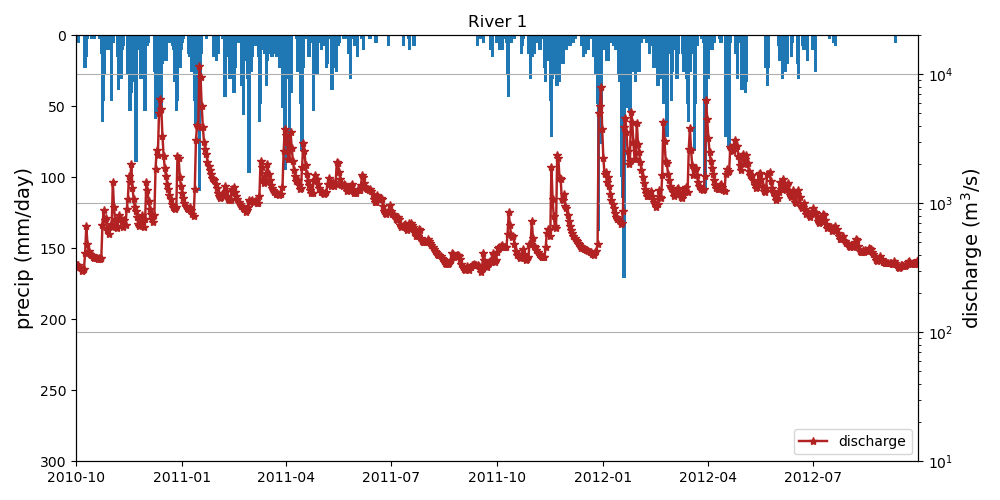

In [6]:
plot_precip_discharge(river1, label_str="River 1")


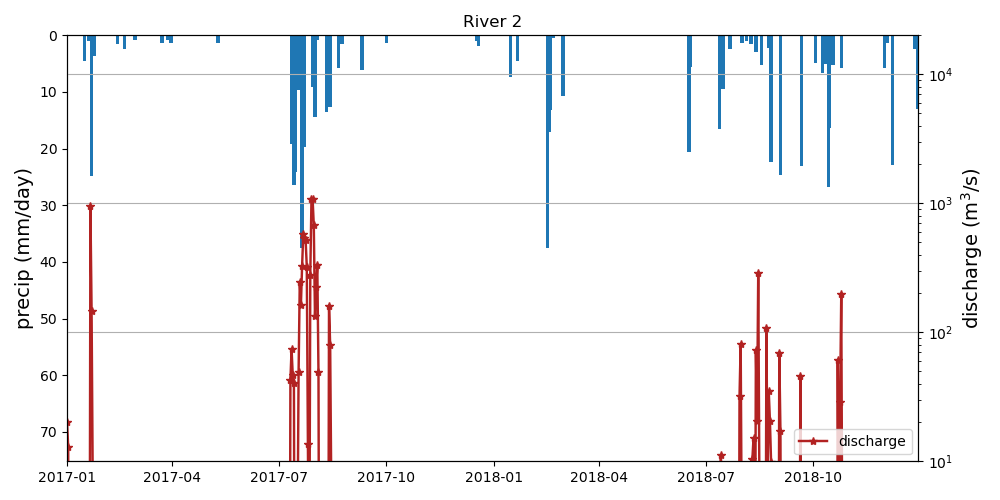

In [7]:
plot_precip_discharge(river2, label_str="River 2")

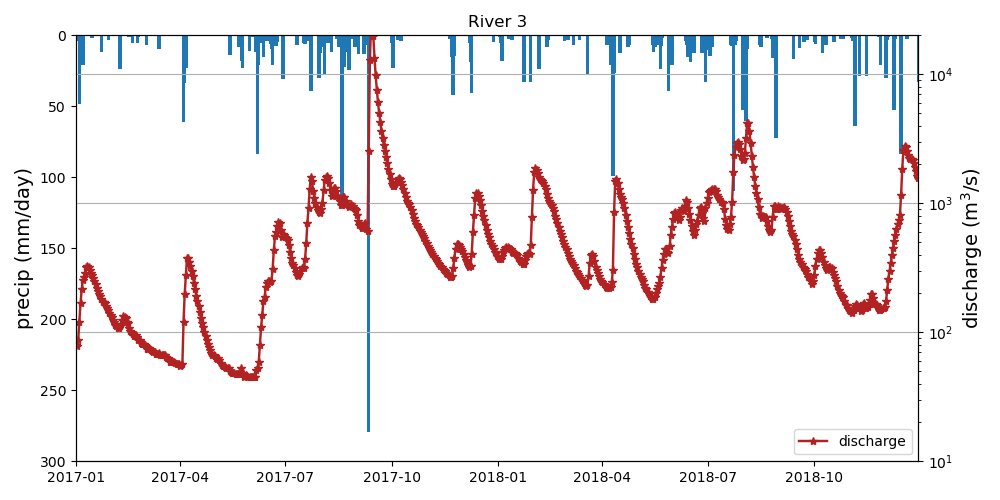

In [8]:
plot_precip_discharge(river3, label_str="River 3")

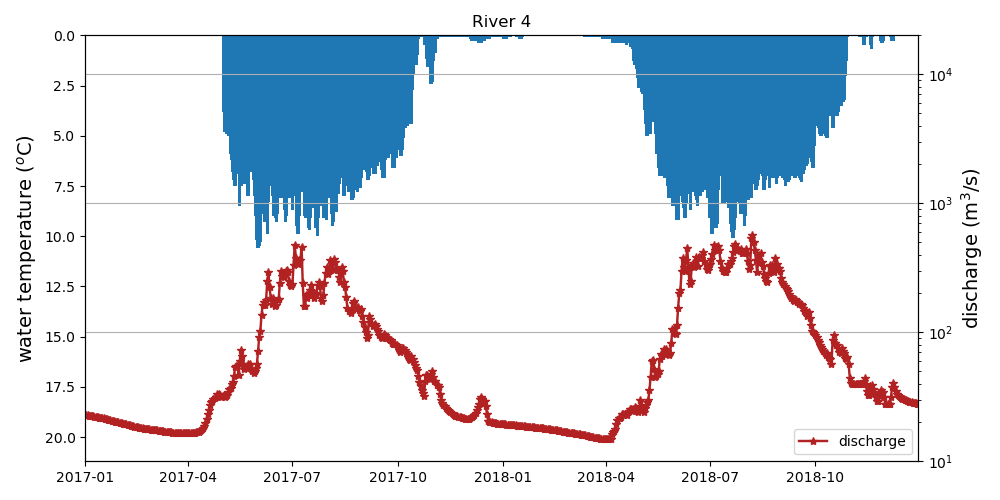

In [9]:
plot_precip_discharge(river4, temp_flag=1, label_str="River 4")